### Imports und Weissemodell

In [2]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd

In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

### Weisemodel über die Zeit

In [5]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);

### Enzym- und Proteinraten

In [7]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()


### Proteinraten über die Zeit gepoltet

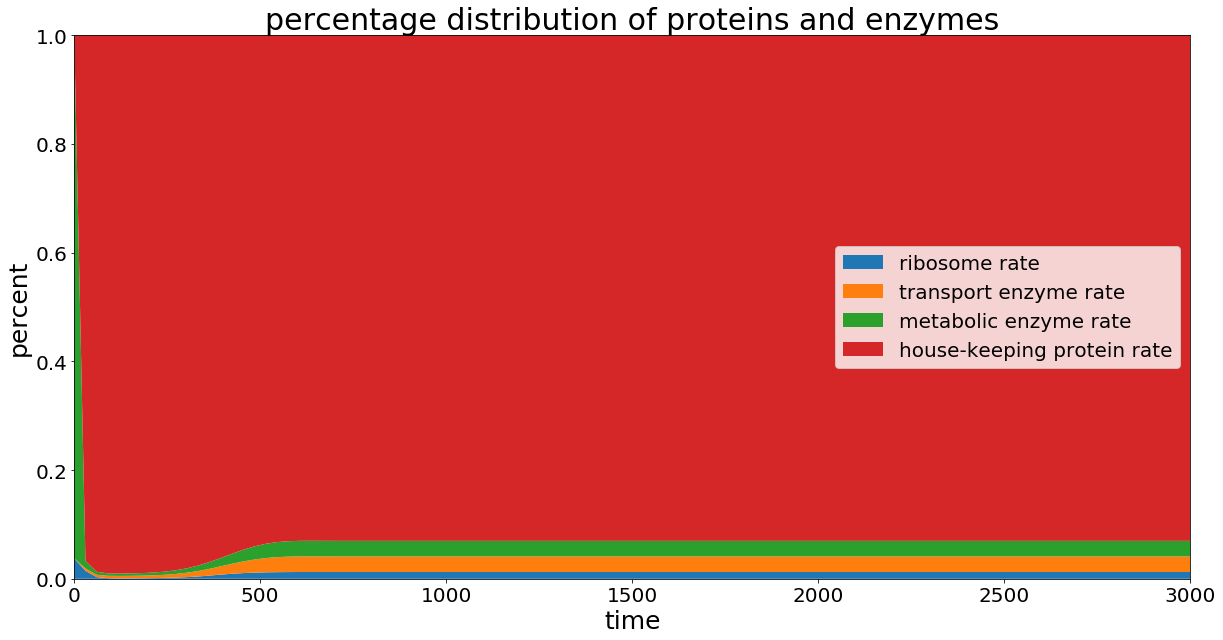

In [10]:
# Make data
data = pd.DataFrame({'group_A':vr, 'group_B':vt, 'group_C':vm, 'group_D':vq}, index=s.getT())
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
plt.title('percentage distribution of proteins and enzymes', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

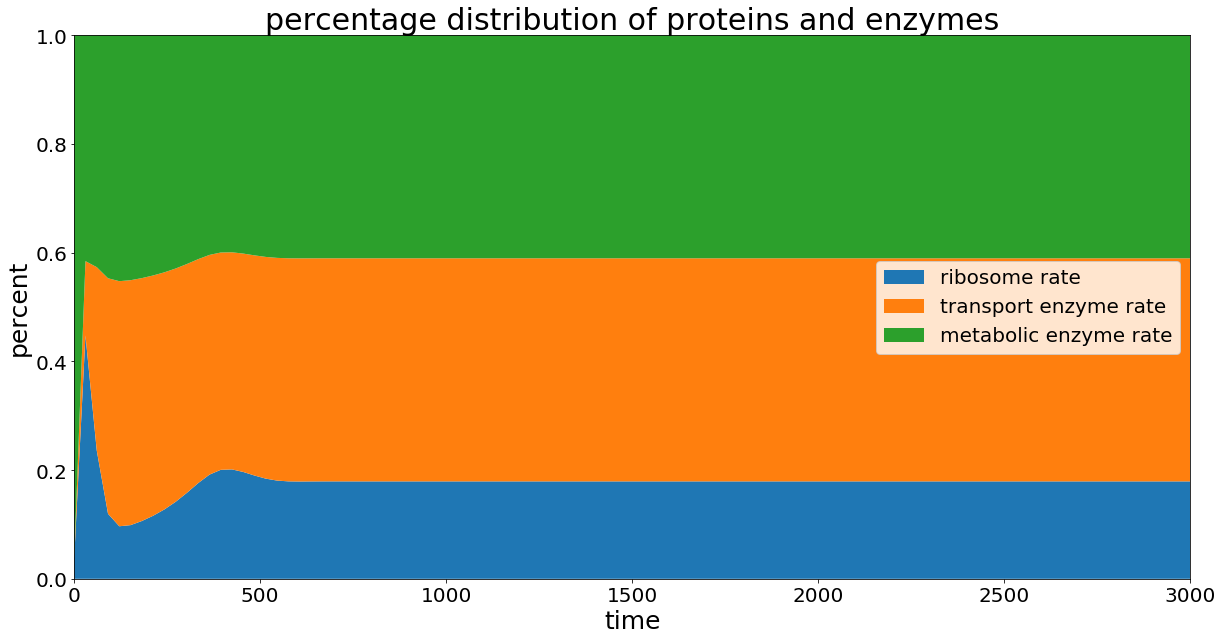

In [11]:
# Make data
data = pd.DataFrame({'group_A':vr, 'group_B':vt, 'group_C':vm}, index=s.getT())
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
plt.title('percentage distribution of proteins and enzymes', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteinraten mit Aminosäuren multipliziert

In [21]:
vramino, vtamino, vmamino, vqamino = [], [], [], []
for i , data in enumerate(vr):
    vramino.append(vr[i]* 7459)
    vtamino.append(vt[i]* 300)
    vmamino.append(vm[i]* 300)
    vqamino.append(vq[i]* 300)

### Proteinraten mit Aminosäuren multipliziert über die Zeit gepoltet

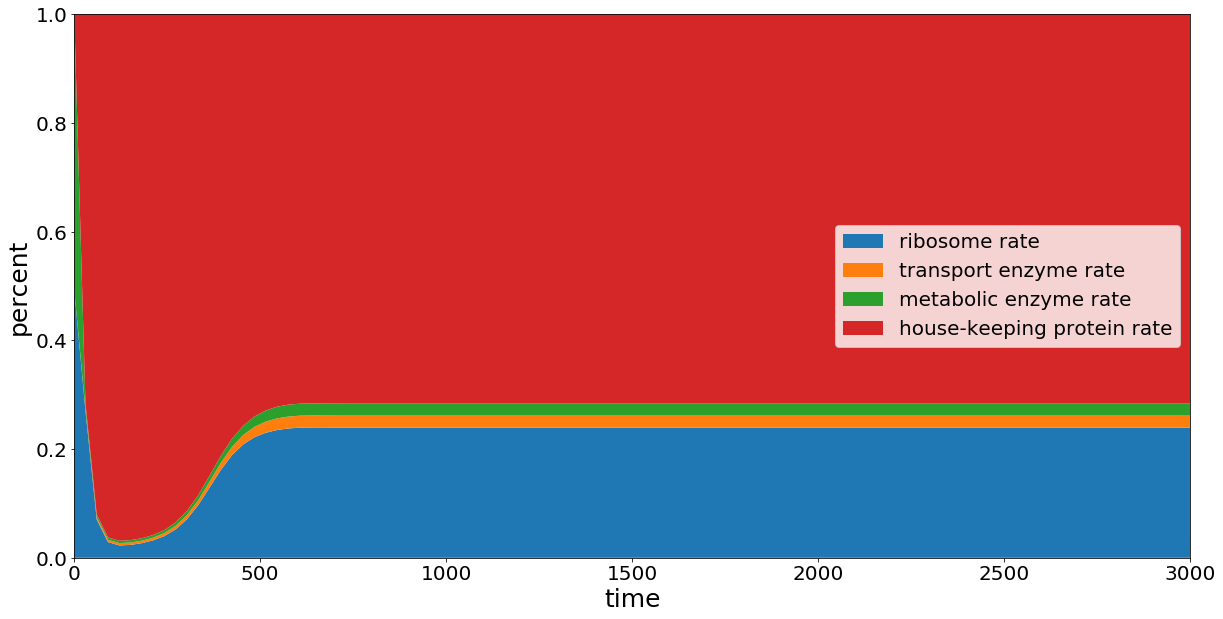

In [16]:
# Make data
data = pd.DataFrame({'group_A':vramino, 'group_B':vtamino, 'group_C':vmamino, 'group_D':vqamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes in amino acids', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

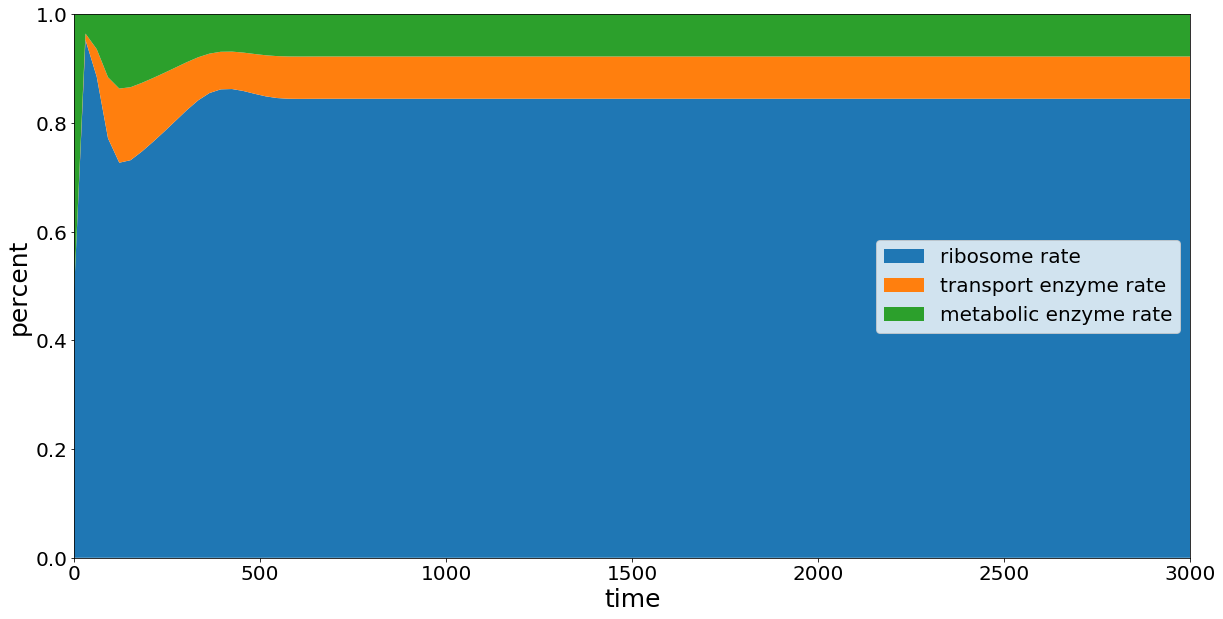

In [17]:
# Make data
data = pd.DataFrame({'group_A':vramino, 'group_B':vtamino, 'group_C':vmamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes in amino acids', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

# Translationsinhibition

In [18]:
valuesOneHundredTimeStepsInh, valuesLastTimeStepInh = [],[]
minh = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

minh.par.update({'gammamax': 10})
sinh = modelbase.Simulator(minh)
changedValuesOverTimeArrayInh = sinh.timeCourse(np.linspace(0,3000,100),weise_values);
valuesOneHundredTimeStepsInh.append(changedValuesOverTimeArrayInh)
valuesLastTimeStepInh.append(changedValuesOverTimeArrayInh[-1])

### Enzym- und Proteinraten nach Inhibierung

In [23]:
vrinh = sinh.getRate('vr').tolist()
vtinh = sinh.getRate('vt').tolist()
vminh = sinh.getRate('vm').tolist()
vqinh = sinh.getRate('vq').tolist()


### Komplexe und Proteine nach Inhibierung über die Zeit gepoltet

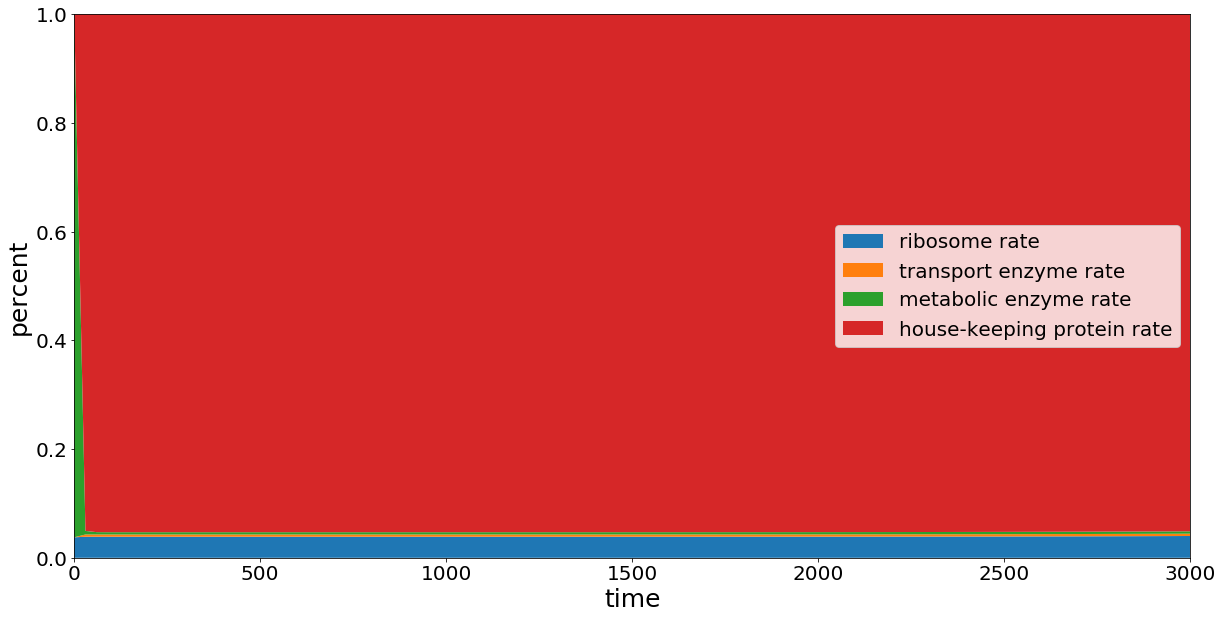

In [25]:
# Make data
data = pd.DataFrame({'group_A':vrinh, 'group_B':vtinh, 'group_C':vminh, 'group_D':vqinh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"],data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('percentage distribution of proteins and enzymes \n with inhibition of the translation rate', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

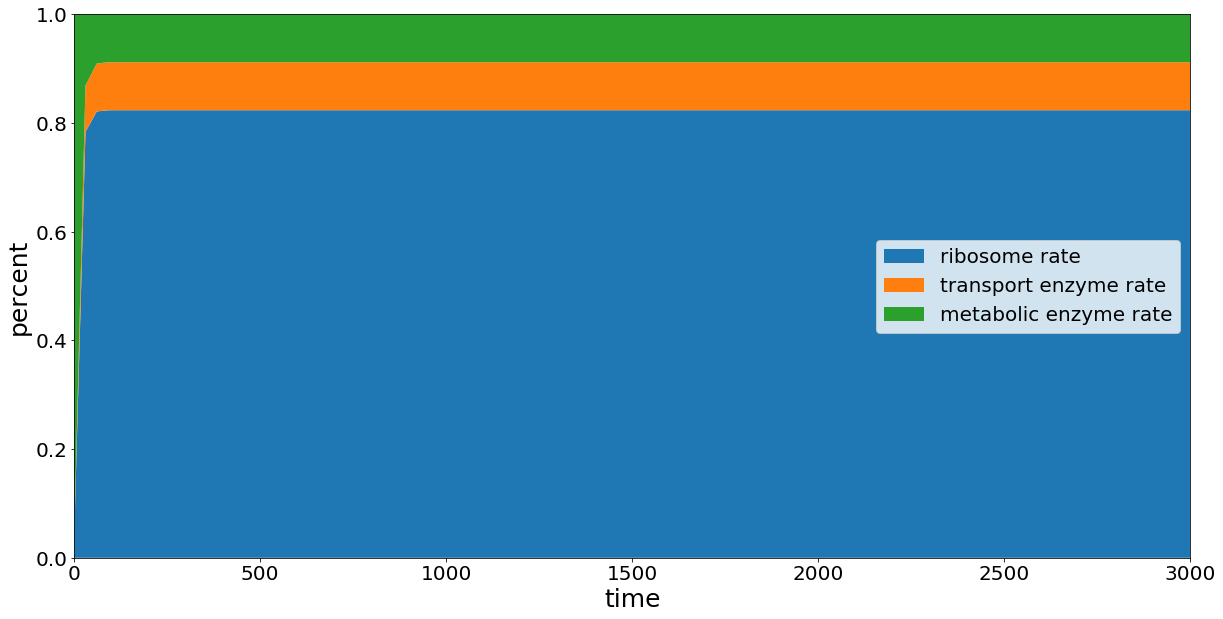

In [26]:
# Make data
data = pd.DataFrame({'group_A':vrinh, 'group_B':vtinh, 'group_C':vminh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('percentage distribution of proteins and enzymes \n with inhibition of the translation rate', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteinrate nach Inhibierung mit aminosäuren multipliziert

In [27]:
vrinhamino, vtinhamino, vminhamino, vqinhamino = [], [], [], []
for i , data in enumerate(vrinh):
    vrinhamino.append(vrinh[i]* 7459)
    vtinhamino.append(vtinh[i]* 300)
    vminhamino.append(vminh[i]* 300)
    vqinhamino.append(vqinh[i]* 300)
    

### Proteinrate nach Inhibierung mit Aminosäuren multipliziert über die Zeit gepoltet

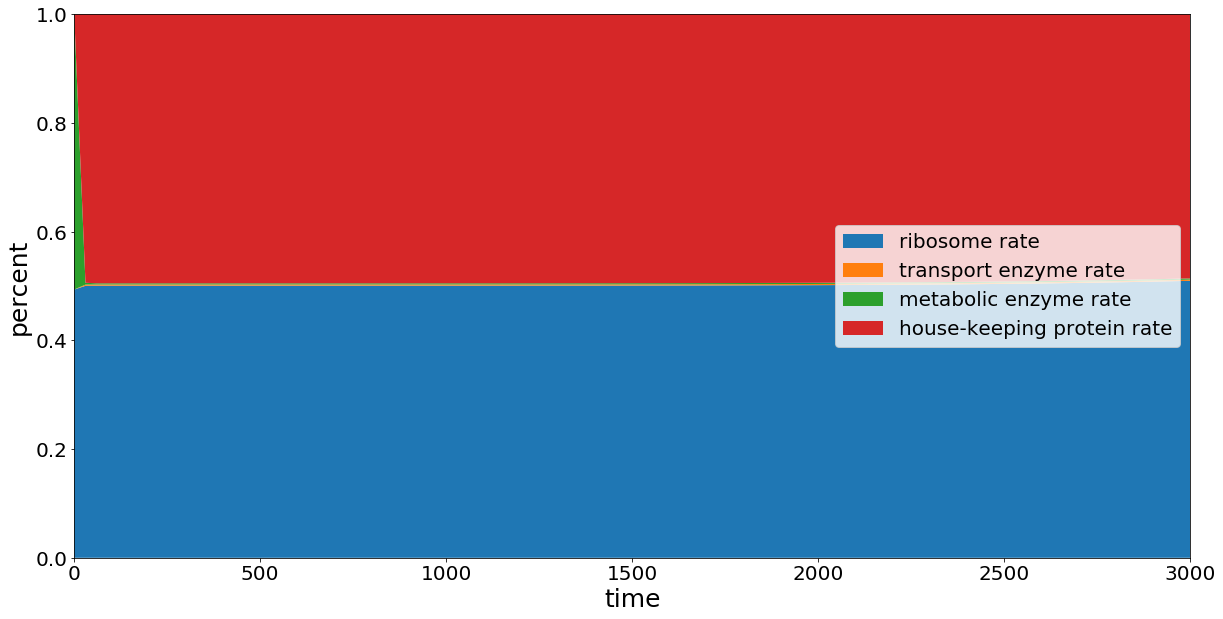

In [29]:
# Make data
data = pd.DataFrame({'group_A':vrinhamino, 'group_B':vtinhamino, 'group_C':vminhamino, 'group_D':vqinhamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes  \n  with inhibition of the translation rate in amino acids', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

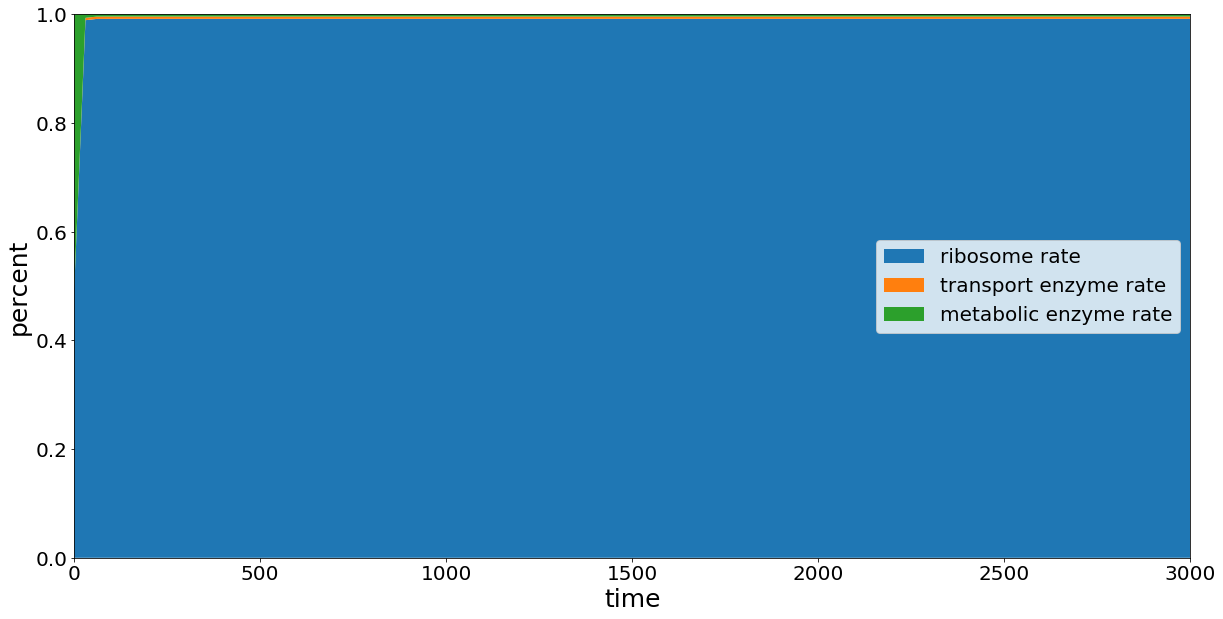

In [30]:
# Make data
data = pd.DataFrame({'group_A':vrinhamino, 'group_B':vtinhamino, 'group_C':vminhamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes  \n  with inhibition of the translation rate in amino acids', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Translation wie im Weisemodel für m's

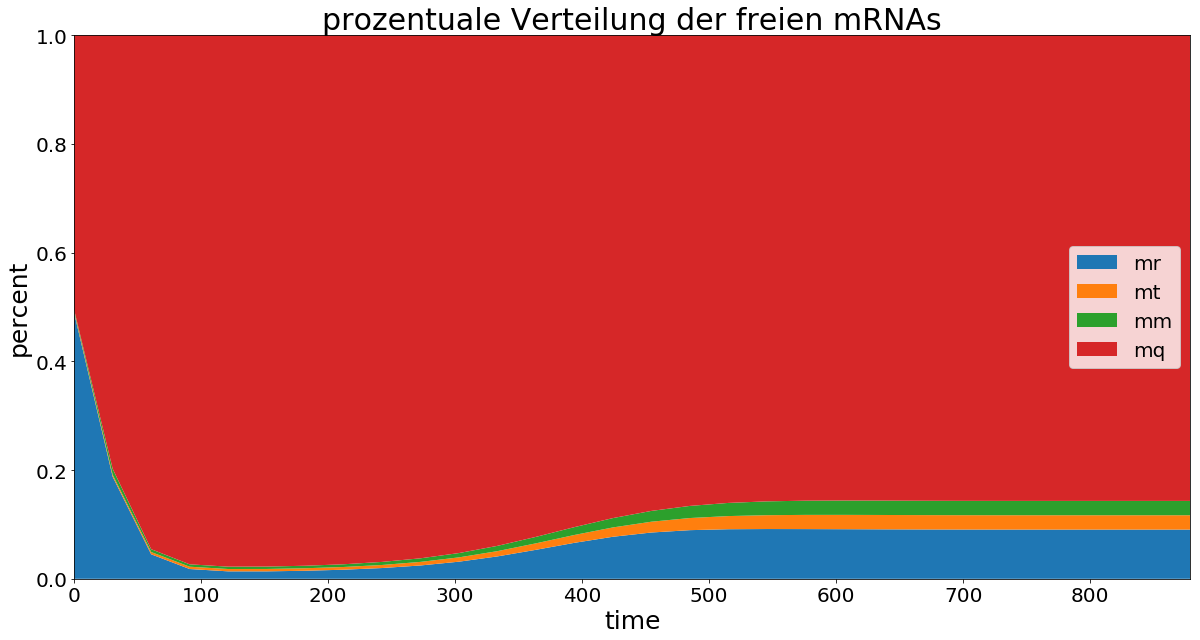

In [22]:
mr = s.getY()[:,2]
mt = s.getY()[:,3]
mm = s.getY()[:,4]
mq = s.getY()[:,5]

# Make data
data = pd.DataFrame({'group_A':mr[0:30], 'group_B':mt[0:30], 'group_C':mm[0:30], 'group_D':mq[0:30] }, index=s.getT()[0:30])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT()[0:30],  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['mr','mt','mm', 'mq'])
plt.legend(loc='center right' ,prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der freien mRNAs', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

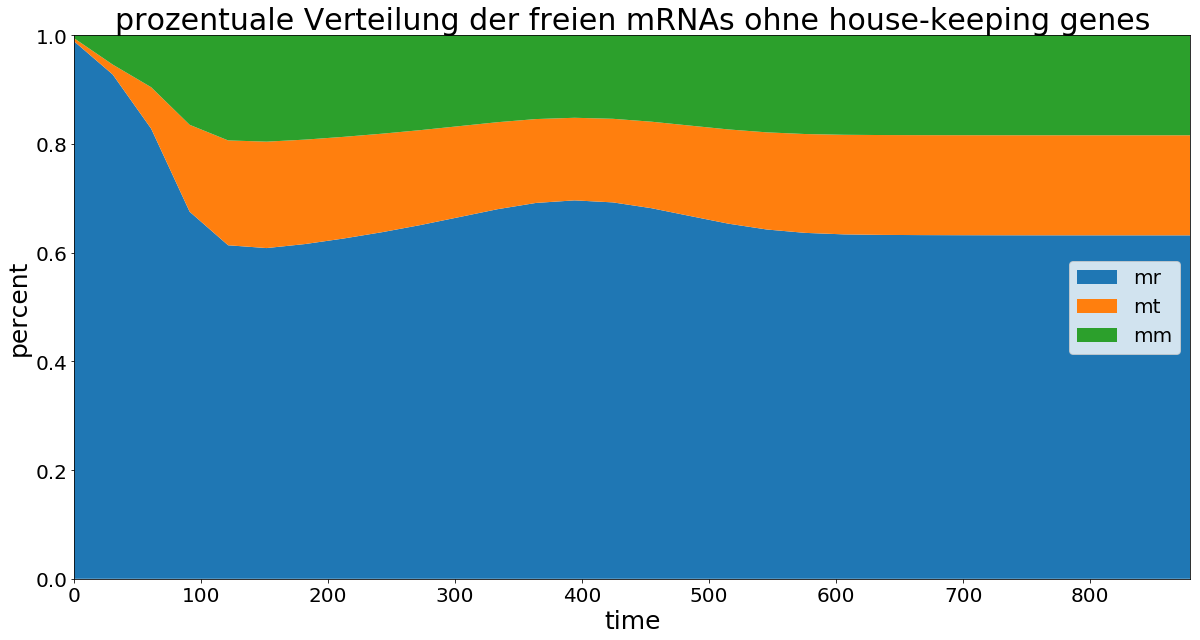

In [23]:
mr = s.getY()[:,2]
mt = s.getY()[:,3]
mm = s.getY()[:,4]
mq = s.getY()[:,5]

# Make data
data = pd.DataFrame({'group_A':mr[0:30], 'group_B':mt[0:30], 'group_C':mm[0:30]}, index=s.getT()[0:30])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT()[0:30],  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['mr','mt','mm'])
plt.legend(loc='center right' ,prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der freien mRNAs ohne house-keeping genes', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Translationsrate inhibiert ms

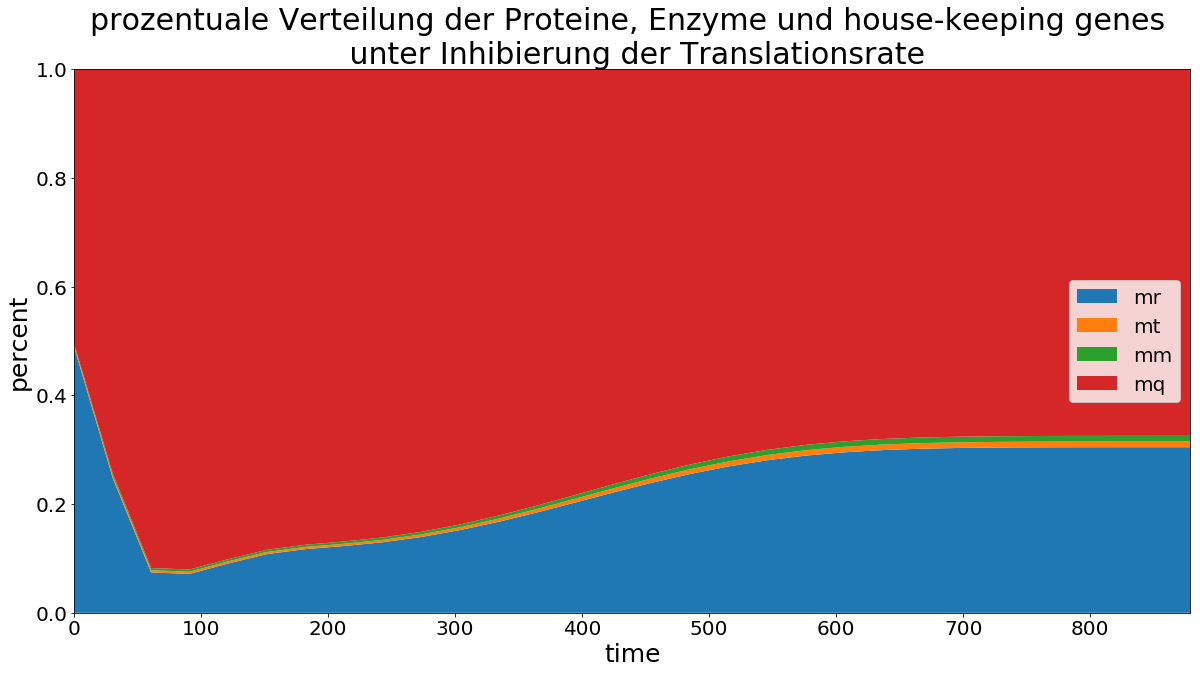

In [21]:
mrinh = sinh.getY()[:,2].tolist()
mtinh = sinh.getY()[:,3].tolist()
mminh = sinh.getY()[:,4].tolist()
mqinh = sinh.getY()[:,5].tolist()

# Make data
data = pd.DataFrame({'group_A':mrinh[0:30], 'group_B':mtinh[0:30], 'group_C':mminh[0:30], 'group_D':mqinh[0:30]}, index=sinh.getT()[0:30])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT()[0:30],  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"],data_perc["group_D"], labels=['mr','mt','mm', 'mq'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine, Enzyme und house-keeping genes \n unter Inhibierung der Translationsrate', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Translationsrate inhibiert ohne mq

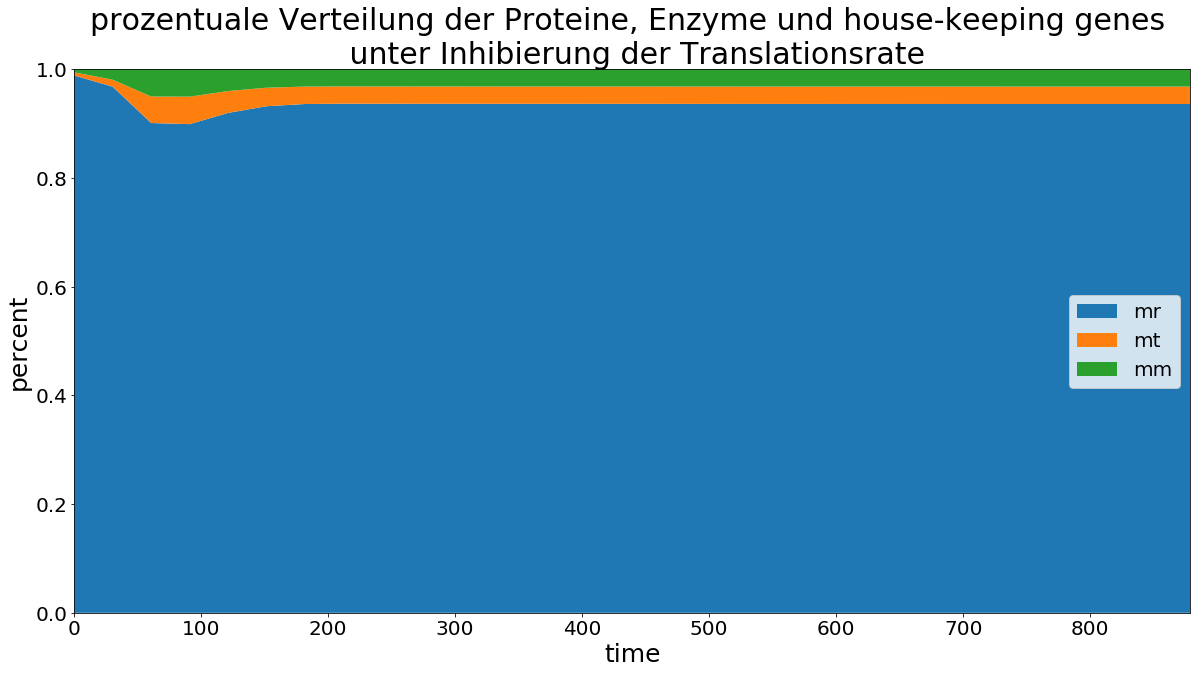

In [28]:
# Make data
data = pd.DataFrame({'group_A':mrinh[0:30], 'group_B':mtinh[0:30], 'group_C':mminh[0:30]}, index=sinh.getT()[0:30])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT()[0:30],  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['mr','mt','mm'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine, Enzyme und house-keeping genes \n unter Inhibierung der Translationsrate', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [88]:
s.getY()[:,2]

array([8514.558     ,  489.64428249,   86.03041186,   36.75853637,
         30.91526706,   33.64277751,   38.52609247,   44.54671666,
         51.79910782,   60.60123685,   71.05350326,   82.24276048,
         91.24642653,   93.9350504 ,   88.62412134,   77.65163032,
         64.88741003,   53.49995483,   45.14118378,   39.90634163,
         36.99651781,   35.50086879,   34.76224184,   34.40028278,
         34.22135321,   34.13246991,   34.08876142,   34.0677339 ,
         34.05783175,   34.05320483,   34.05101958,   34.04996584,
         34.04945011,   34.04919793,   34.04907635,   34.04901869,
         34.04899156,   34.04897872,   34.04897256,   34.04896957,
         34.04896811,   34.04896741,   34.04896707,   34.04896691,
         34.04896683,   34.0489668 ,   34.04896678,   34.04896677,
         34.04896677,   34.04896677,   34.04896677,   34.04896676,
         34.04896676,   34.04896676,   34.04896676,   34.04896676,
         34.04896676,   34.04896676,   34.04896676,   34.04896

In [93]:
pr = s.getY()[:,10]
pt = s.getY()[:,11]
pm = s.getY()[:,12]
pq = s.getY()[:,13]

<bound method Model.set_cpds of <weisse.WeisseBaseModel object at 0x1171f42b0>>